<a href="https://colab.research.google.com/github/blinov-89/DTP/blob/main/%D0%9F%D0%BE%D0%B3%D0%BE%D0%B4%D0%B0_%D0%B8_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D1%8B_%22Score_%3D_0_420505_%D0%94%D0%A2%D0%9F_baseline_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
 from scipy import stats
 from scipy.stats import randint
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
pip install geolocator

In [ ]:
import pandas as pd
import numpy as np
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

In [ ]:
pip install geopandas

In [ ]:
import folium
import pandas as pd
from geopandas.tools import geocode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Загрузка датасета

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/train_dataset_train.csv")

In [ ]:
df.info()

In [ ]:
df['Место'].value_counts()

In [ ]:
df['Место'].str.split(',').str[:2]

In [ ]:
df['Район'] = df['Место'].str.split(',').str[1]
df['Область'] = df['Место'].str.split(',').str[0]
df['Место']=df.apply(lambda x:'%s,%s' % (x['Область'],x['Район']),axis=1)

In [ ]:
df

In [ ]:
# df['Место'] = df['Место'].str.split(',').str[:2]
# df['Место']  = df['Место'].astype('object')
# df2 = df[:5]
# df2
# df2['Место']= df['Место']

In [ ]:
w = pd.read_excel("/content/drive/MyDrive/Дагестан ДТП ИИ/погода.xlsx")

In [ ]:
w.info()

In [ ]:
w['Дата'] = w["Местное время в Нижнем Новгороде"].str[:10]

In [ ]:
print(list(w.columns.values))

In [ ]:
w = w.drop(['RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'Tn', 'Tx', 'W1', 'W2', 'Cm', 'Ch', 'Местное время в Нижнем Новгороде'], axis = 1)

In [ ]:
df1 = pd.merge(df, w, how='left', on='Дата')

In [ ]:
df1.info()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# df1=pd.concat([df, w], axis=1)

In [ ]:
df1.head(3)

In [ ]:
df2 = df1.fillna(0)

In [ ]:
# df3 = df2['Место'][:5]
# df3

In [ ]:
df3 = pd.DataFrame(df2['Место'].value_counts())

In [ ]:
df3['Место']

In [ ]:
# df3 = df2[:15]
# df3

In [ ]:
# df2['city_coord'] = df2['Место'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

In [ ]:
# cols = ['Место', 'Улица', 'Дом']
# df2['address'] = df2[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
# df3['city_coord'] = df3.apply(geolocator.geocode)

In [ ]:
geolocator = Nominatim(user_agent="my_request")

In [ ]:
# df2['city_coord'] = df2['Место'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
# df2

In [ ]:
# df2['city_coord'] = df2['city_coord'].astype('str')

In [ ]:
# df2['city_coord'].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 

In [ ]:
# pip install geopandas

In [ ]:
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("'Новгородская', 'область,', 'Великий', 'Новгород'")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

In [ ]:
#import requires modules
from geopandas.tools import geocode
 
#address we need to locate
loc = 'Новгородская область, Новгородский район'
 
#finding the location
location = geocode(loc, provider="nominatim" , user_agent = 'my_request')
 
point = location.geometry.iloc[0]
print('Name: '+ loc )
print('complete address: '+ location.address.iloc[0])
print('longitude: {} '.format(point.x))
print('latitude: {} '.format(point.y))

In [ ]:
# df3 = df2[:500]
# df3

In [ ]:
def custom_geocoder(address):
    dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request')
    point = dataframe.geometry.iloc[0]
    return pd.Series({'Latitude': point.y, 'Longitude': point.x})
 
#Applying function to the dataframe
df3[['latitude' , 'longitude']]= df3.Место.apply( lambda x: custom_geocoder(x))

In [ ]:
df3.head(3)

In [ ]:
df3 = df3.drop(['Место'], axis = 1)


In [ ]:
df3 = df3.reset_index()

In [ ]:
df3['Место'] = df3['index']


In [ ]:
df3 = df3.drop(['index'], axis = 1)

In [ ]:
df4 = pd.merge(df1, df3, how='left', on='Место')
df4

In [ ]:
df1 = df4

In [ ]:
# #Importing the requires modules
# import folium
# import pandas as pd
# from geopandas.tools import geocode
 
# #Creating a DataFrame
# # wonders = ['Новгородская область, Великий Новгород',
# #  'Новгородская область, Великий Новгород',
# #  'Новгородская область, Великий Новгород',
# #  'Новгородская область, Новгородский район, Савинский, д Зарелье',
# #  'Новгородская область, Окуловский район']

# # wonders = list(df3[:10])

# # df = pd.DataFrame({'wonders' : wonders})
 
# #function to unzip latitude and longitude from GeoDataFrame
# def custom_geocoder(address):
#     dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request')
#     point = dataframe.geometry.iloc[0]
#     return pd.Series({'Latitude': point.y, 'Longitude': point.x})
 
# #Applying function to the dataframe
# df[['latitude' , 'longitude']]= df.wonders.apply( lambda x: custom_geocoder(x))
 
# df

In [ ]:
df1['Вид ДТП'].value_counts()

In [ ]:
df = df1

## Рассмотрим датасет по ближе

In [ ]:
df.head()

In [ ]:
min(df['Дата'])

In [ ]:
max(df['Дата'])

In [ ]:
len(df['Дорога'].unique())

In [ ]:
len(df['Место'].unique())

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Погибло'].value_counts()

In [ ]:
df['Погибло детей'].value_counts()

In [ ]:
df['Ранено'].value_counts()

In [ ]:
df['Ранено детей'].value_counts()

Заменим все пропуски в данных

In [ ]:
df = df.fillna(0)

Добавим пару новых столбцов

In [ ]:
df["День"] = df["Дата"].str[:2]
df["Месяц"] = df["Дата"].str[3:5]
df["Год"] = df["Дата"].str[8:]
df["Час"] = df["Время"].str[:2]

In [ ]:
df.head(3)

# Сделаем категории **"Вид ДТП"** и **"Улица"** раноговыми 

In [ ]:
df["Вид ДТП"] = pd.Categorical(df["Вид ДТП"])
df["Вид ДТП"].astype('category').cat.codes
df["Вид ДТП"] = df["Вид ДТП"].cat.codes

In [ ]:
df["Улица"] = pd.Categorical(df["Улица"])
df["Улица"].astype('category').cat.codes
df["Улица"] = df["Улица"].cat.codes

In [ ]:
df["Место"] = pd.Categorical(df["Место"])
df["Место"].astype('category').cat.codes
df["Место"] = df["Место"].cat.codes

In [ ]:
df["Дорога"] = pd.Categorical(df["Дорога"])
df["Дорога"].astype('category').cat.codes
df["Дорога"] = df["Дорога"].cat.codes

In [ ]:
df["DD"] = pd.Categorical(df["DD"])
df["DD"].astype('category').cat.codes
df["DD"] = df["DD"].cat.codes

In [ ]:
df["N"] = pd.Categorical(df["N"])
df["N"].astype('category').cat.codes
df["N"] = df["N"].cat.codes

In [ ]:
df["Cl"] = pd.Categorical(df["Cl"])
df["Cl"].astype('category').cat.codes
df["Cl"] = df["Cl"].cat.codes

In [ ]:
df["H"] = pd.Categorical(df["H"])
df["H"].astype('category').cat.codes
df["H"] = df["H"].cat.codes

In [ ]:
df["Nh"] = pd.Categorical(df["Nh"])
df["Nh"].astype('category').cat.codes
df["Nh"] = df["Nh"].cat.codes

In [ ]:
df["WW"] = pd.Categorical(df["WW"])
df["WW"].astype('category').cat.codes
df["WW"] = df["WW"].cat.codes

In [ ]:
df["Район"] = pd.Categorical(df["Район"])
df["Район"].astype('category').cat.codes
df["Район"] = df["Район"].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  int8   
 4   Улица          35771 non-null  int16  
 5   Дом            35771 non-null  object 
 6   Дорога         35771 non-null  int16  
 7   Километр       35771 non-null  float64
 8   Метр           35771 non-null  float64
 9   Вид ДТП        35771 non-null  int8   
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  Район          35771 non-null  int8   
 15  Область        35771 non-null  object 
 16  T              35771 non-null  float64
 17  Po             35771 non-null  float64
 18  P     

Пострим на распределение данных

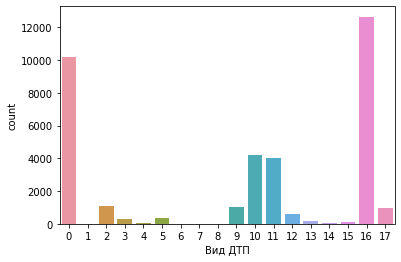

In [ ]:
sns.countplot(x = "Вид ДТП" , data  = df)  

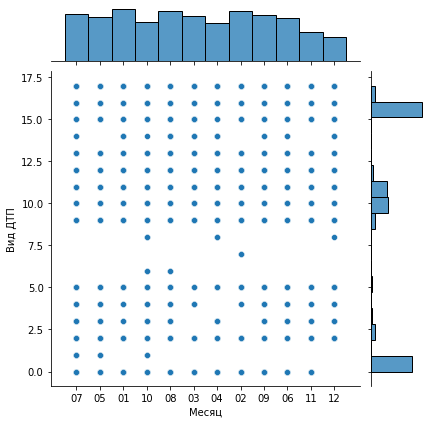

In [ ]:
sns.jointplot(x = 'Месяц', y = "Вид ДТП" , data = df)

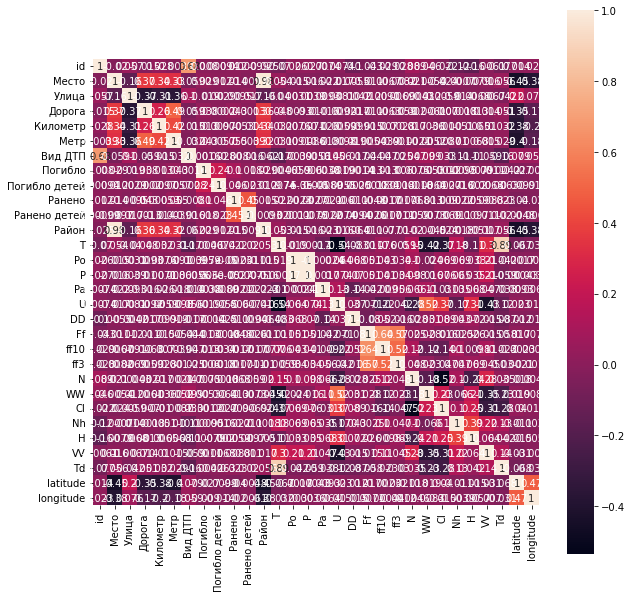

In [ ]:
plt.rcParams['figure.figsize']=(10,10)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [ ]:
df["День"] = df["День"].astype('int')
df["Месяц"] = df["Месяц"].astype('int')
df["Час"] = df["Час"].astype('int')

In [ ]:
df["Год"] = df["Год"].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35771 non-null  int64  
 1   Дата           35771 non-null  object 
 2   Время          35771 non-null  object 
 3   Место          35771 non-null  int8   
 4   Улица          35771 non-null  int16  
 5   Дом            35771 non-null  object 
 6   Дорога         35771 non-null  int16  
 7   Километр       35771 non-null  float64
 8   Метр           35771 non-null  float64
 9   Вид ДТП        35771 non-null  int8   
 10  Погибло        35771 non-null  int64  
 11  Погибло детей  35771 non-null  int64  
 12  Ранено         35771 non-null  int64  
 13  Ранено детей   35771 non-null  int64  
 14  Район          35771 non-null  int8   
 15  Область        35771 non-null  object 
 16  T              35771 non-null  float64
 17  Po             35771 non-null  float64
 18  P     

In [ ]:
X = df.drop(["Дата", "Время","id", "Дом", "Погибло",	"Погибло детей",	"Ранено",	"Ранено детей", 'Область'], axis = 1)

In [ ]:
X

,Место,Улица,Дорога,Километр,Метр,Вид ДТП,Район,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,latitude,longitude,День,Месяц,Год,Час
0,3,60,0,0.0,0.0,16,4,22.9,744.2,757.7,-0.2,66.0,7,1.0,2.0,4.0,8,1,1,8,8,10.0,16.2,63.010797,22.930639,13,7,18,17
1,3,60,0,0.0,0.0,16,4,15.7,751.7,765.8,-1.2,17.0,10,4.0,10.0,10.0,10,1,0,0,0,10.0,-9.4,63.010797,22.930639,11,5,18,17
2,3,551,0,0.0,0.0,0,4,0.6,730.0,744.4,-0.3,71.0,4,3.0,5.0,7.0,7,1,6,4,8,10.0,-4.1,63.010797,22.930639,25,1,20,14
3,11,95,0,0.0,0.0,0,12,16.1,740.9,754.7,-0.2,49.0,12,2.0,4.0,6.0,8,1,4,5,8,10.0,5.4,36.304770,2.226821,11,5,20,11
4,12,0,102,430.0,5.0,2,13,-11.4,747.9,763.3,1.0,80.0,14,1.0,3.0,5.0,2,37,6,5,8,10.0,-14.2,46.206028,7.312438,9,1,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,3,0,0,0.0,0.0,16,4,23.4,747.4,760.9,0.1,56.0,9,1.0,4.0,4.0,3,1,4,3,2,10.0,14.2,63.010797,22.930639,15,5,19,7
35767,3,390,0,0.0,0.0,16,4,7.4,745.3,759.7,3.2,93.0,11,3.0,6.0,7.0,2,4,6,7,8,10.0,6.3,63.010797,22.930639,15,10,19,8
35768,17,0,0,0.0,0.0,11,18,4.4,739.0,753.4,-1.2,50.0,12,2.0,6.0,7.0,8,1,7,9,6,10.0,-5.3,52.591237,13.323320,10,3,19,9
35769,11,0,2,544.0,870.0,0,12,16.4,750.1,764.1,-1.5,51.0,14,2.0,6.0,9.0,8,1,6,8,8,10.0,6.1,36.304770,2.226821,13,9,20,5


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35771 entries, 0 to 35770
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Место      35771 non-null  int8   
 1   Улица      35771 non-null  int16  
 2   Дорога     35771 non-null  int16  
 3   Километр   35771 non-null  float64
 4   Метр       35771 non-null  float64
 5   Вид ДТП    35771 non-null  int8   
 6   Район      35771 non-null  int8   
 7   T          35771 non-null  float64
 8   Po         35771 non-null  float64
 9   P          35771 non-null  float64
 10  Pa         35771 non-null  float64
 11  U          35771 non-null  float64
 12  DD         35771 non-null  int8   
 13  Ff         35771 non-null  float64
 14  ff10       35771 non-null  float64
 15  ff3        35771 non-null  float64
 16  N          35771 non-null  int8   
 17  WW         35771 non-null  int8   
 18  Cl         35771 non-null  int8   
 19  Nh         35771 non-null  int8   
 20  H     

# model 1

In [ ]:
y = df[["Погибло"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 7,  
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [ ]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeaefae890>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeaefae190>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeaeebcb90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeaefae2d0>},
                   scoring='roc_auc', verbose=3)

# Test

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/test_dataset_test.csv")

In [ ]:
test = test.set_index('id')

In [ ]:
test.head(3)

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП
id,,,,,,,,,
490078911,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,NaN,NaN,NaN,Столкновение
490055448,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,NaN,NaN,NaN,Столкновение
490054440,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Наезд на препятствие


In [ ]:
test.shape

(6788, 9)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 490078911 to 490109680
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Дата      6788 non-null   object 
 1   Время     6788 non-null   object 
 2   Место     6788 non-null   object 
 3   Улица     3852 non-null   object 
 4   Дом       3881 non-null   object 
 5   Дорога    1905 non-null   object 
 6   Километр  1904 non-null   float64
 7   Метр      1904 non-null   float64
 8   Вид ДТП   4988 non-null   object 
dtypes: float64(2), object(7)
memory usage: 530.3+ KB


In [ ]:
test['Район'] = test['Место'].str.split(',').str[1]
test['Область'] = test['Место'].str.split(',').str[0]
test['Место']=test.apply(lambda x:'%s,%s' % (x['Область'],x['Район']),axis=1)

In [ ]:
test = pd.merge(test, w, how='left', on='Дата')

In [ ]:
test = pd.merge(test, df3, how='left', on='Место')
test.head(3)

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Район,Область,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,latitude,longitude
0,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,NaN,NaN,NaN,Столкновение,Великий Новгород,Новгородская область,-9.2,736.8,751.9,1.0,82.0,"Ветер, дующий с востоко-юго-востока",3.0,8.0,10.0,100%.,Снег непрерывный слабый в срок наблюдения.,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,4.0,-11.7,63.010797,22.930639
1,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,NaN,NaN,NaN,Столкновение,Великий Новгород,Новгородская область,24.0,745.6,759.1,0.2,48.0,"Ветер, дующий с северо-запада",2.0,6.0,7.0,40%.,,Кучевые средние или мощные или вместе с кучевы...,40%.,1000-1500,10.0,12.3,63.010797,22.930639
2,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Наезд на препятствие,Великий Новгород,Новгородская область,14.2,730.3,743.8,-0.9,97.0,"Ветер, дующий с востока",2.0,NaN,8.0,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,3.0,13.8,63.010797,22.930639


Заменим все пропуски в данных

In [ ]:
test = test.fillna(0)

Добавим пару новых столбцов

In [ ]:
test["День"] = test["Дата"].str[:2]
test["Месяц"] = test["Дата"].str[3:5]
test["Год"] = test["Дата"].str[8:]
test["Час"] = test["Время"].str[:2]

In [ ]:
test.head(3)

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Район,Область,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,latitude,longitude,День,Месяц,Год,Час
0,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,0,0.0,0.0,Столкновение,Великий Новгород,Новгородская область,-9.2,736.8,751.9,1.0,82.0,"Ветер, дующий с востоко-юго-востока",3.0,8.0,10.0,100%.,Снег непрерывный слабый в срок наблюдения.,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,4.0,-11.7,63.010797,22.930639,31,01,18,19
1,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,0,0.0,0.0,Столкновение,Великий Новгород,Новгородская область,24.0,745.6,759.1,0.2,48.0,"Ветер, дующий с северо-запада",2.0,6.0,7.0,40%.,,Кучевые средние или мощные или вместе с кучевы...,40%.,1000-1500,10.0,12.3,63.010797,22.930639,19,06,19,10
2,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",0,0,0,0.0,0.0,Наезд на препятствие,Великий Новгород,Новгородская область,14.2,730.3,743.8,-0.9,97.0,"Ветер, дующий с востока",2.0,0.0,8.0,100%.,Дождь незамерзающий непрерывный слабый в срок ...,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,3.0,13.8,63.010797,22.930639,28,06,19,03


##Сделаем категории **"Вид ДТП"** и **"Улица"** раноговыми 

In [ ]:
test["Вид ДТП"] = pd.Categorical(test["Вид ДТП"])
test["Вид ДТП"].astype('category').cat.codes
test["Вид ДТП"] = test["Вид ДТП"].cat.codes

In [ ]:
test["Улица"] = pd.Categorical(test["Улица"])
test["Улица"].astype('category').cat.codes
test["Улица"] = test["Улица"].cat.codes

In [ ]:
test["Место"] = pd.Categorical(test["Место"])
test["Место"].astype('category').cat.codes
test["Место"] = test["Место"].cat.codes

In [ ]:
test["Дорога"] = pd.Categorical(test["Дорога"])
test["Дорога"].astype('category').cat.codes
test["Дорога"] = test["Дорога"].cat.codes

In [ ]:
test["День"] = test["День"].astype('int')
test["Месяц"] = test["Месяц"].astype('int')
test["Час"] = test["Час"].astype('int')
test["Год"] = test["Год"].astype('int')

In [ ]:
test["DD"] = pd.Categorical(test["DD"])
test["DD"].astype('category').cat.codes
test["DD"] = test["DD"].cat.codes

In [ ]:
test["N"] = pd.Categorical(test["N"])
test["N"].astype('category').cat.codes
test["N"] = test["N"].cat.codes

In [ ]:
test["Cl"] = pd.Categorical(test["Cl"])
test["Cl"].astype('category').cat.codes
test["Cl"] = test["Cl"].cat.codes

In [ ]:
test["H"] = pd.Categorical(test["H"])
test["H"].astype('category').cat.codes
test["H"] = test["H"].cat.codes

In [ ]:
test["Nh"] = pd.Categorical(test["Nh"])
test["Nh"].astype('category').cat.codes
test["Nh"] = test["Nh"].cat.codes

In [ ]:
test["WW"] = pd.Categorical(test["WW"])
test["WW"].astype('category').cat.codes
test["WW"] = test["WW"].cat.codes

In [ ]:
test["Район"] = pd.Categorical(test["Район"])
test["Район"].astype('category').cat.codes
test["Район"] = test["Район"].cat.codes

In [ ]:
test = test.drop(["Дата", "Время", "Дом", 'Область'], axis = 1)

In [ ]:
test.head(3)

,Место,Улица,Дорога,Километр,Метр,Вид ДТП,Район,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,Cl,Nh,H,VV,Td,latitude,longitude,День,Месяц,Год,Час
0,3,228,0,0.0,0.0,15,4,-9.2,736.8,751.9,1.0,82.0,3,3.0,8.0,10.0,2,29,8,2,7,4.0,-11.7,63.010797,22.930639,31,1,18,19
1,3,29,0,0.0,0.0,15,4,24.0,745.6,759.1,0.2,48.0,9,2.0,6.0,7.0,4,1,4,4,2,10.0,12.3,63.010797,22.930639,19,6,19,10
2,3,0,0,0.0,0.0,9,4,14.2,730.3,743.8,-0.9,97.0,1,2.0,0.0,8.0,2,6,8,2,4,3.0,13.8,63.010797,22.930639,28,6,19,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 0 to 6787
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Место      6788 non-null   int8   
 1   Улица      6788 non-null   int16  
 2   Дорога     6788 non-null   int16  
 3   Километр   6788 non-null   float64
 4   Метр       6788 non-null   float64
 5   Вид ДТП    6788 non-null   int8   
 6   Район      6788 non-null   int8   
 7   T          6788 non-null   float64
 8   Po         6788 non-null   float64
 9   P          6788 non-null   float64
 10  Pa         6788 non-null   float64
 11  U          6788 non-null   float64
 12  DD         6788 non-null   int8   
 13  Ff         6788 non-null   float64
 14  ff10       6788 non-null   float64
 15  ff3        6788 non-null   float64
 16  N          6788 non-null   int8   
 17  WW         6788 non-null   int8   
 18  Cl         6788 non-null   int8   
 19  Nh         6788 non-null   int8   
 20  H       

# Pred

In [ ]:
perd_test = model.predict(test)

In [ ]:
perd_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test2 = pd.read_csv("/content/drive/MyDrive/Дагестан ДТП ИИ/test_dataset_test.csv")

In [ ]:
test2 = test2.set_index('id')

In [ ]:
submit = test2[[]]

In [ ]:
submit['Погибло'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['Погибло'] = submit['Погибло'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,Погибло
id,
490078911,0
490055448,0
490054440,0


# модель 2

In [ ]:
y = df[["Погибло детей"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 7, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [ ]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea948a510>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea948a910>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea948a7d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea948a610>},
                   scoring='roc_auc', verbose=3)

# Pred

In [ ]:
perd_test = model.predict(test)

In [ ]:
perd_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submit['Погибло детей'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['Погибло детей'] = submit['Погибло детей'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,Погибло,Погибло детей
id,,
490078911,0,0
490055448,0,0
490054440,0,0


# модель 3

In [ ]:
y = df[["Ранено"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 7, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [ ]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   error_score=0, estimator=XGBClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeb223bd50>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faeb22da710>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea9485810>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faea90d3b10>},
                   scoring='roc_auc', verbose=3)

# Pred

In [ ]:
perd_test = model.predict(test)

In [ ]:
perd_test

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
submit['Ранено'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['Ранено'] = submit['Ранено'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,Погибло,Погибло детей,Ранено
id,,,
490078911,0,0,0
490055448,0,0,0
490054440,0,0,1


# модель 4

In [ ]:
y = df[["Ранено детей"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# sc.fit(xtest)
# X_train_std = sc.transform(xtrain)
# X_test_std = sc.transform(xtest)
# lr = LogisticRegression(C=100.0, random_state=1)
# lr.fit(X_train_std, ytrain)
# y_pred = lr.predict(X_test_std)
# target = list(y['Ранено детей'].unique().astype('str'))
# target
# print(classification_report(ytest, y_pred, target_names=target))

In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

kfold_5 = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 7, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [ ]:
model.fit(xtrain, ytrain.values.ravel())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


# Pred

In [ ]:
perd_test = model.predict(test)

In [ ]:
perd_test

In [ ]:
submit['Ранено детей'] = perd_test

In [ ]:
submit['Ранено детей'] = submit['Ранено детей'].astype(int)

In [ ]:
submit.head()

# Сохранение

In [ ]:
submit.to_csv('submit_DTP.csv',  index=True)

In [ ]:
submit

In [ ]:
submit.describe()